In [224]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

In [225]:
data = pd.read_csv('/content/output_data.csv')

In [226]:
data.dropna(subset = ['d_spread', 'd_avg_attendence',
       'd_m_enroll', 'd_f_enroll', 'd_t_enroll', 'd_budget', 'd_ppg',
       'd_oppg', "venue_capacity","venue_capacity", "attendance"],how = 'any', inplace=True)

In [227]:
x = data[['d_avg_attendence','d_m_enroll', 'd_f_enroll', 'd_t_enroll', 'd_budget', 'venue_capacity', 'attendance']]

In [228]:
y = data['d_spread']

In [229]:
mirResults = mutual_info_regression(x,y)

In [230]:
mirResults

array([0.07259078, 0.01061002, 0.03470649, 0.        , 0.08251979,
       0.00873899, 0.03560161])

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


In [232]:
X_train, X_val, y_train, y_val = train_test_split(x, y, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.76045e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.1345769417081384

In [233]:
from sklearn.inspection import permutation_importance

In [207]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_val, y_val, n_repeats=1000, random_state=0)
importances = result.importances_mean


In [208]:
result.importances_std

array([0.02094949, 0.01486194, 0.01661245, 0.00114332, 0.01824254,
       0.01762867, 0.01629631])

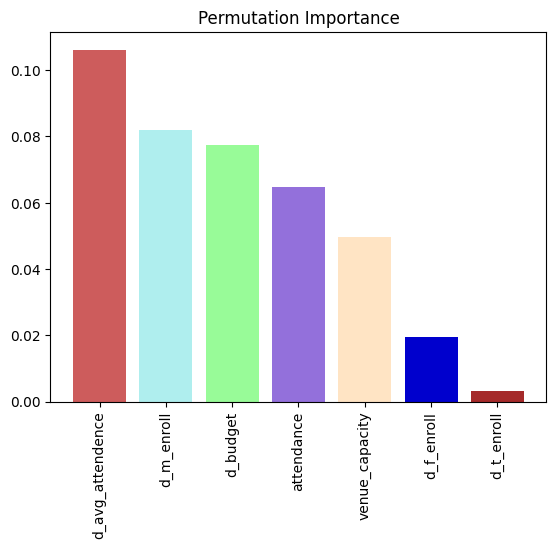

In [209]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]
colors = ['indianred', 'paleturquoise', 'palegreen', 'mediumpurple', 'bisque', 'mediumblue', 'brown', 'pink', 'gray', 'cyan']
plt.figure()
plt.title("Permutation Importance")
plt.bar(range(X_val.shape[1]), importances[indices], color=colors)
plt.xticks(range(X_val.shape[1]), X_val.columns[indices], rotation=90)
plt.show()


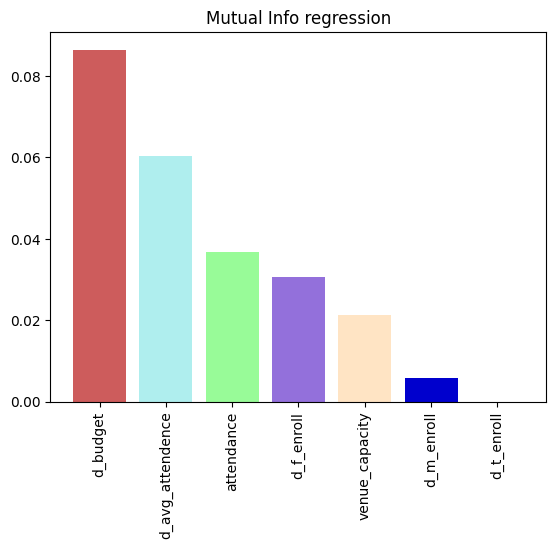

In [210]:
indices = np.argsort(mirResults)[::-1]
colors = ['indianred', 'paleturquoise', 'palegreen', 'mediumpurple', 'bisque', 'mediumblue', 'brown', 'pink', 'gray', 'cyan']
plt.figure()
plt.title("Mutual Info regression")
plt.bar(range(X_val.shape[1]), mirResults[indices], color=colors)
plt.xticks(range(X_val.shape[1]), X_val.columns[indices], rotation=90)
plt.show()

In [211]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your data
data = pd.read_csv("output_data.csv")

In [212]:
# Define your target based on the conditions (assuming 'h_points_game' and 'a_points_game' are in your dataset)
data['outcome'] = (data['h_points_game'] > data['a_points_game']).astype(int)

In [213]:
# Update features to be used for prediction
features = [
    'd_avg_attendence', 'd_m_enroll', 'd_f_enroll', 'd_t_enroll',
    'd_budget', 'd_ppg', 'd_oppg', 'venue_capacity'
]

In [214]:
# Prepare feature matrix and target vector
X = data[features]
y = data['outcome']

In [215]:
# Handle missing values by dropping them
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]

In [216]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [217]:
# Initialize and train the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [218]:
# Predict outcomes using the cleaned data
y_pred = random_forest.predict(X_test)

In [219]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [220]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6586826347305389
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.27      0.36       117
           1       0.69      0.87      0.77       217

    accuracy                           0.66       334
   macro avg       0.61      0.57      0.56       334
weighted avg       0.63      0.66      0.62       334



In [221]:
# Update 'outcome' in the original data frame using predictions from the cleaned and used features
data.loc[X_clean.index, 'outcome'] = random_forest.predict(X_clean)
data.to_csv("win_loss_outcome.csv", index=False)

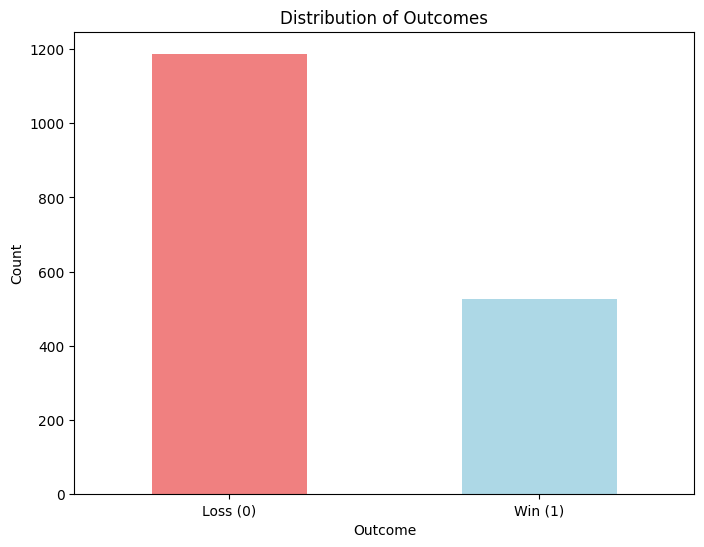

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("win_loss_outcome.csv")

# Check the distribution of outcomes
outcome_counts = data['outcome'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color = ["lightcoral", "lightblue"])
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Loss (0)', 'Win (1)'], rotation=0)  # Set custom labels for the x-axis
plt.show()


In [223]:
print("Total number of outcomes:", data['outcome'].count())

Total number of outcomes: 1714
